## Paczka03



In [1]:


from py4hplc import *

In [3]:
# załadowanie chromatogramów i ich automatyczna obróbka (więcej info w pliku batch.config).

b = Batch('batch.config')


Batch file: batch.config
Batch info: Paczka3: kalibracje + próbki SB
Data directory: .
[1/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 1.txt => WZ1_10uL_210 
[2/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 2.txt => WZ1_10uL_220 
[3/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 3.txt => WZ1_10uL_230 
[4/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 4.txt => WZ1_10uL_240 
[5/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 5.txt => WZ1_10uL_250 
[6/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 6.txt => WZ1_10uL_260 
[7/152] processing: 00087__28-12-WZ1_10uL - MWD 2.1L- Channel 7.txt => WZ1_10uL_270 
[8/152] processing: 00087__28-12-WZ1_10uL - RID2.1L- Channel 1.txt => WZ1_10uL_ri 
[9/152] processing: 00088__28-12-WZ1_5uL - MWD 2.1L- Channel 1.txt => WZ1_5uL_210 
[10/152] processing: 00088__28-12-WZ1_5uL - MWD 2.1L- Channel 2.txt => WZ1_5uL_220 
[11/152] processing: 00088__28-12-WZ1_5uL - MWD 2.1L- Channel 3.txt 

In [4]:
# procedura poocnicza wyświetlająca pełny chromatogram (z pikami i całkmi)

plt.style.use('default')

def plot_report(chromatogram, x1, x2):
    
    t = chromatogram.t
    s = chromatogram.s
    bg_a = chromatogram.bg_a
    bg_b = chromatogram.bg_b
    bg_c = chromatogram.bg_c
    p = chromatogram.peaks
    l = chromatogram.l
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlim(x1,x2)
    ax.set_ylim(min(s)-max(s)*0.05, max(s)*1.2)
    ax.plot(t,s, label=l)    
    ax.plot(t, bg_a + bg_b*t + bg_c*t**2,'k-', linewidth=1)
    ax.plot(p['t_start'].values(), p['s_start'].values(),'y.')
    ax.plot(p['t_end'].values(), p['s_end'].values(), 'r.')
    ax.plot(p['t_max'].values(), p['s_max'].values(), 'k.')


    for i in p['i_start'].keys():
        tt = t[p['i_start'][i]:p['i_end'][i]]
        ss = p['aa'][i]*tt+p['bb'][i]
        ax.plot(tt,ss,'k-', linewidth=0.5)

    for i in p['i_start'].keys():
            tt = p['t_max'][i]
            if tt>x1 and tt<x2:
                ss = p['s_max'][i]
                area = p['area'][i]
                sss = (ss-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0])
                ttt = (tt-ax.get_xlim()[0])/(ax.get_xlim()[1]-ax.get_xlim()[0])                
                label = "({})\n{:.2f}\n{:.2f}".format(i+1,tt,area)
                ax.text(ttt,sss+0.03,label,horizontalalignment='center',transform=ax.transAxes)
    
    plt.legend()           
    plt.tight_layout()
    #plt.savefig('ch1.png', dpi=300)
    plt.show()


### Przejrzenie wyników próbek wzorca 1 (WZ1)


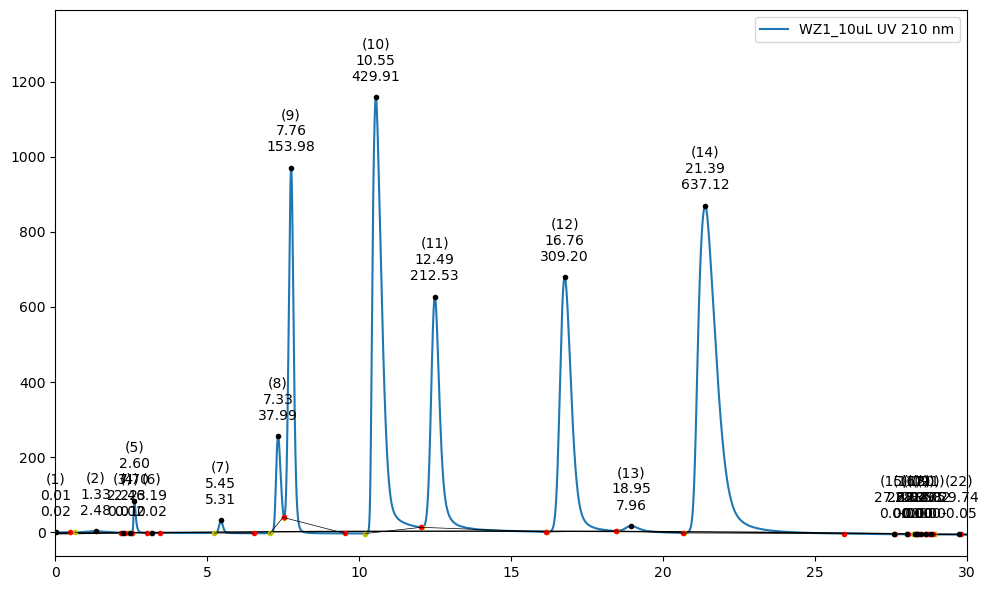

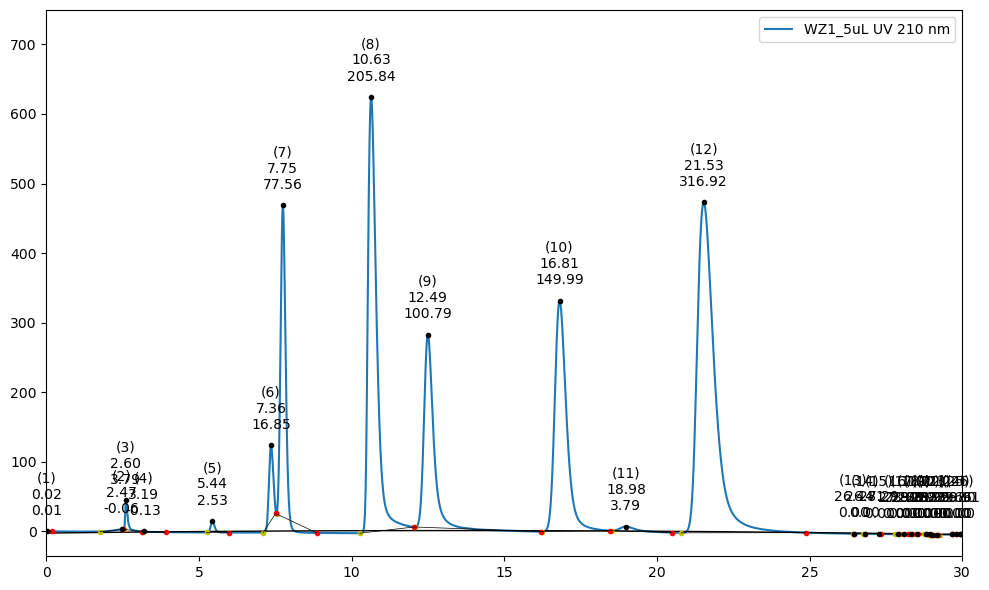

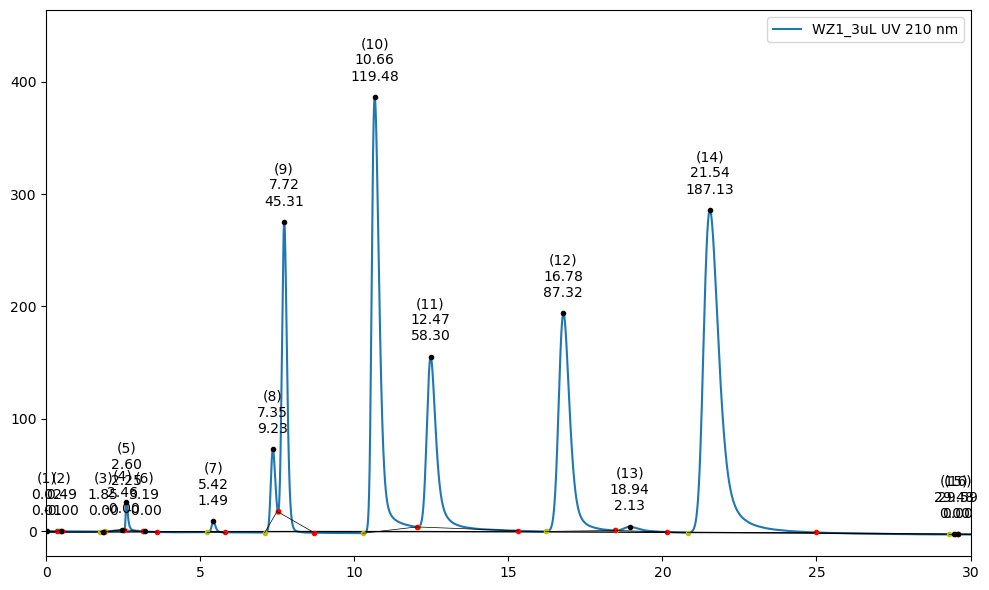

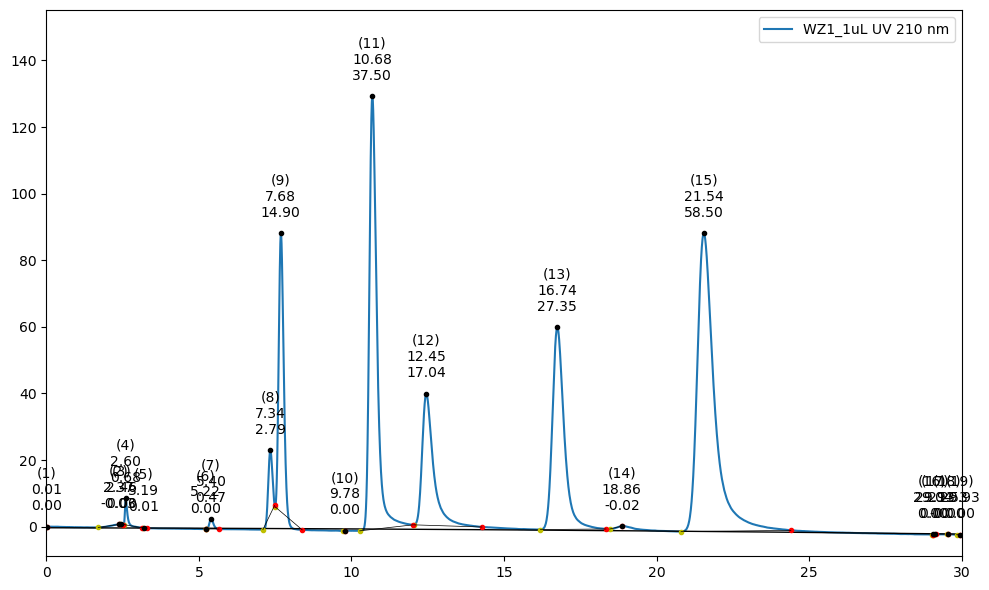

In [5]:



plot_report(b.WZ1_10uL_210, 0, 30)
plot_report(b.WZ1_5uL_210, 0, 30)
plot_report(b.WZ1_3uL_210, 0, 30)
plot_report(b.WZ1_1uL_210, 0, 30)



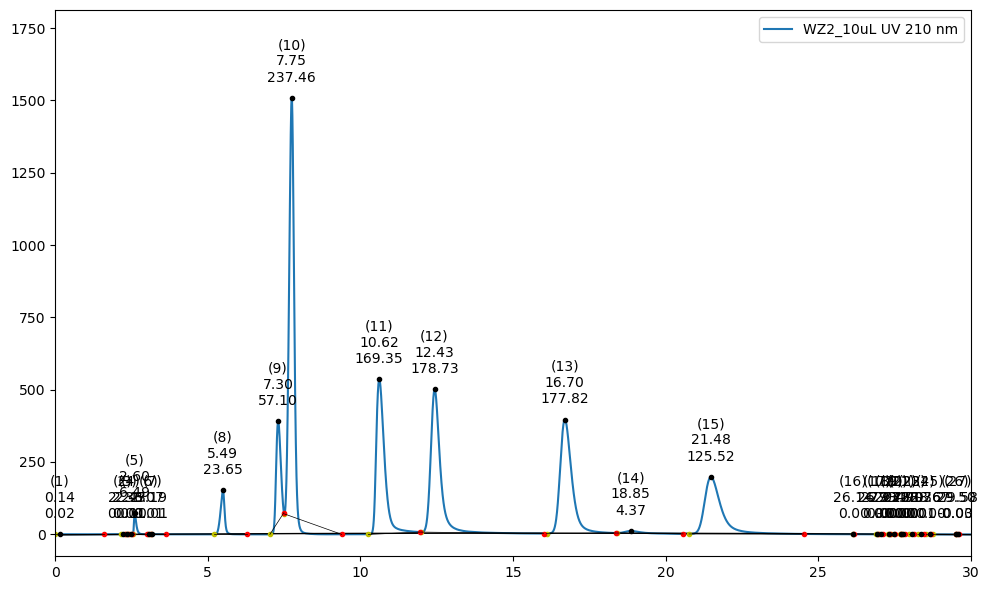

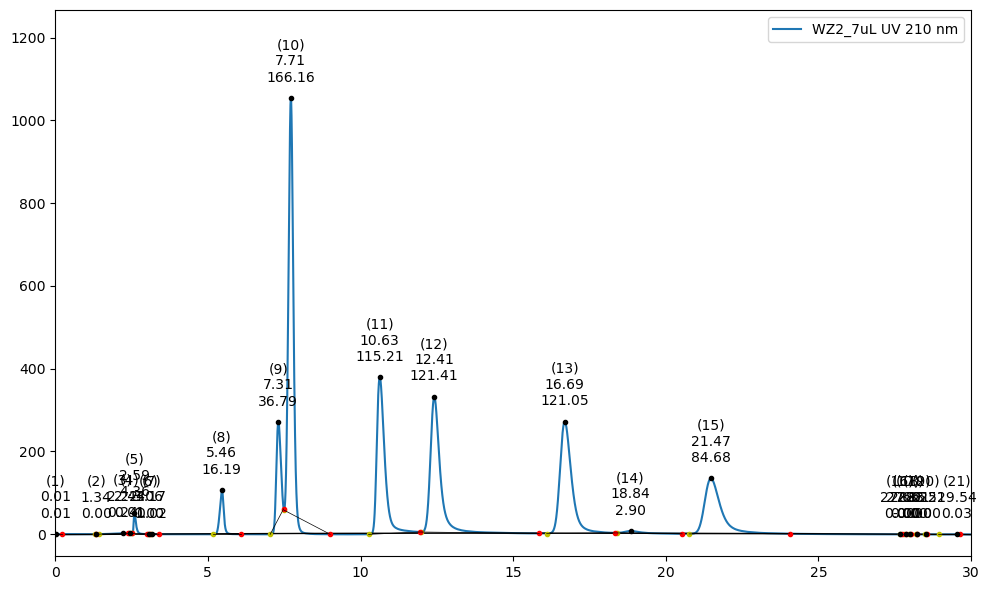

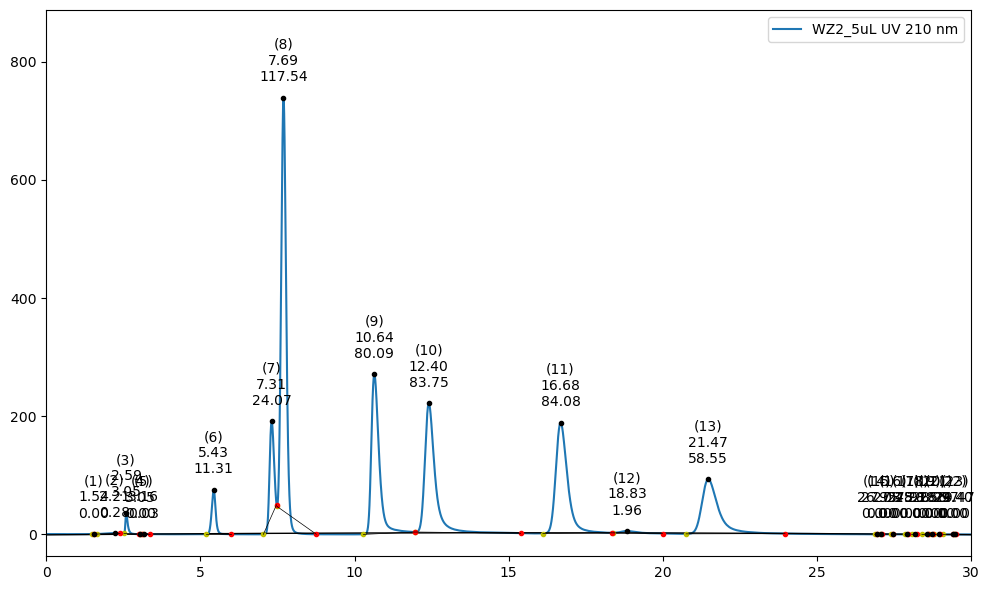

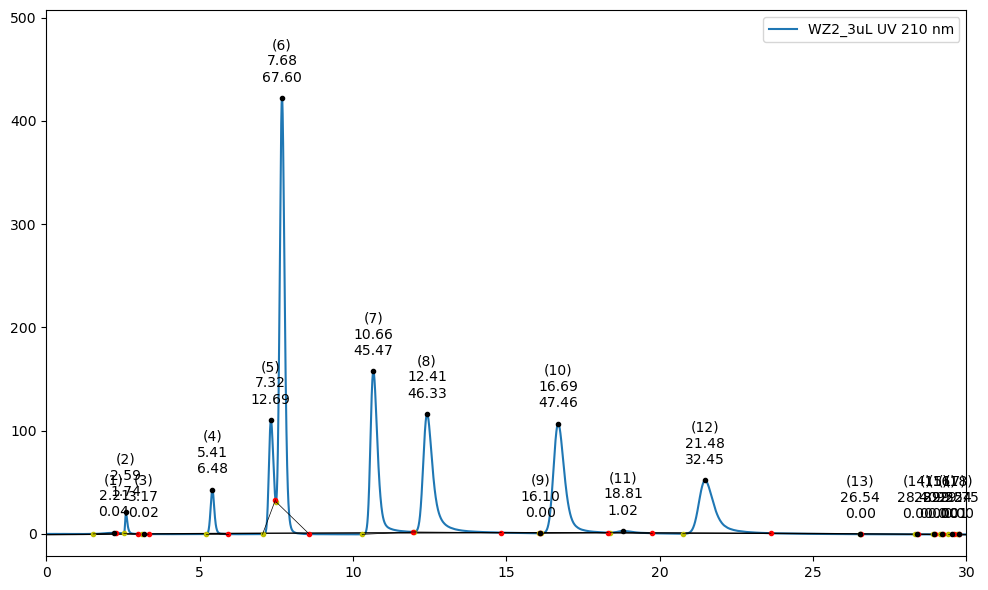

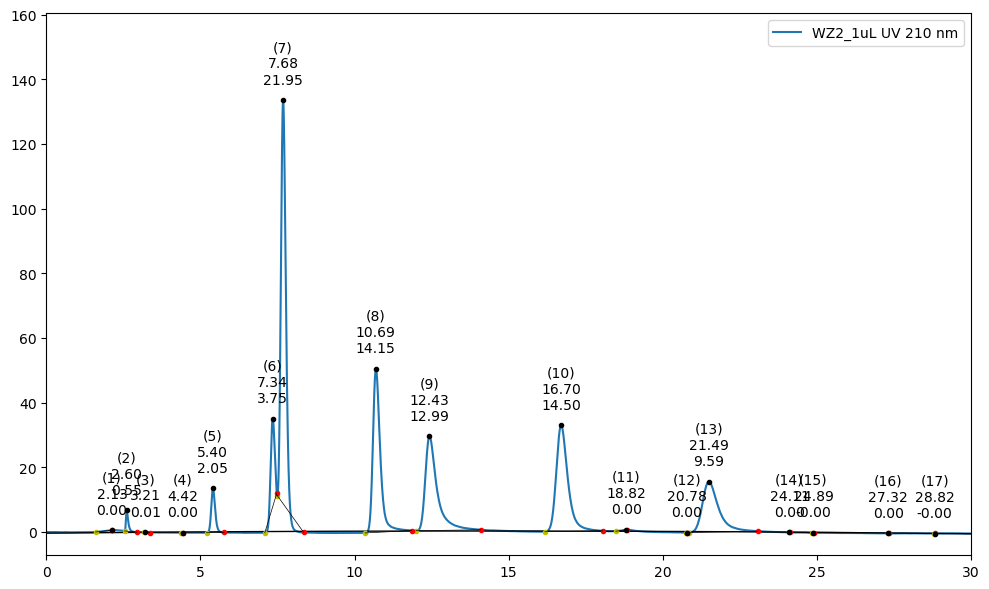

In [6]:
plot_report(b.WZ2_10uL_210, 0, 30)
plot_report(b.WZ2_7uL_210, 0, 30)
plot_report(b.WZ2_5uL_210, 0, 30)
plot_report(b.WZ2_3uL_210, 0, 30)
plot_report(b.WZ2_1uL_210, 0, 30)

In [7]:
#m1 => WZ1
#m2 => WZ2
#UV220
def kalibracja(m1, m2, tR, label):
    # mg/mL
    V = 25
    r1 = m1/V # masa wzorca nastrzykniętego na kolumnę
    r2 = m2/V # masa wzorca nastrzykniętego na kolumnę
    conc = np.array((r1*0.001, r1*0.003,  r1*0.005, r1*0.010, r1*0.001, r2*0.003, r2*0.005,  r2*0.007, r2*0.010))
    areas = np.array([
        b.WZ1_1uL_210.p(tR).a, b.WZ1_3uL_210.p(tR).a, b.WZ1_5uL_210.p(tR).a, b.WZ1_10uL_210.p(tR).a,
        b.WZ2_1uL_210.p(tR).a, b.WZ2_3uL_210.p(tR).a, b.WZ2_5uL_210.p(tR).a, b.WZ2_7uL_210.p(tR).a, b.WZ2_10uL_210.p(tR).a
    ])
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(conc, areas)
    #print(slope, intercept, r_value)
    x = np.linspace(0,max(r1*0.020, r2*0.020))
    y = slope*x+intercept
    fig, ax = plt.subplots()
    ax.plot(x, y, ':k', label = "y=ax+b, a={:.2f} b={:.2f}, R^2={:.3f}".format(slope, intercept, r_value**2))    
    ax.plot(conc, areas, 'bo', mfc='none', label = "wzorce: "+label)
    ax.legend()
    ax.set_xlabel("Masa kwasu nastrzyknięta, mg")
    ax.set_ylabel("Powierzchnia piku")
    plt.show()
    return slope, intercept

In [8]:
tctr=5.3
tcac=7.3
ttac=7.7
tcit=10.7
tmes=12.4
tita=21.5
import scipy

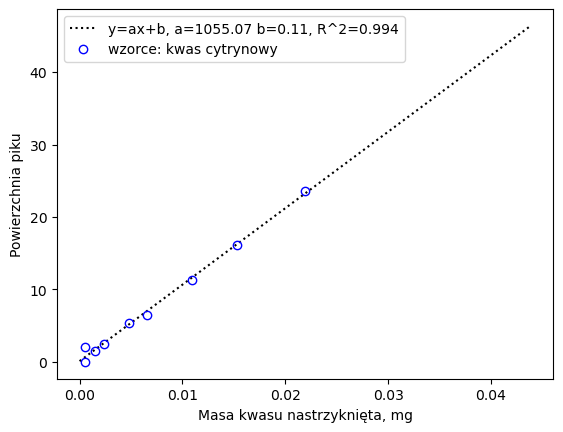

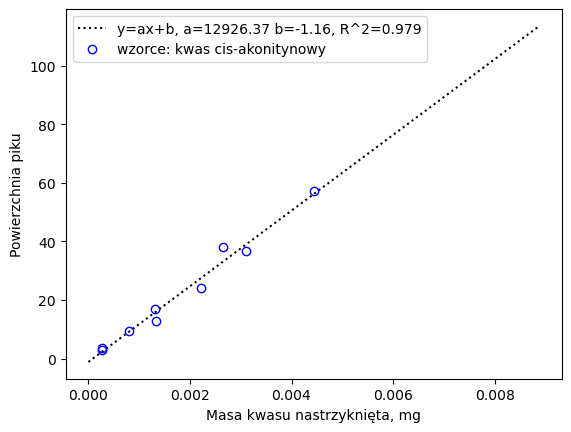

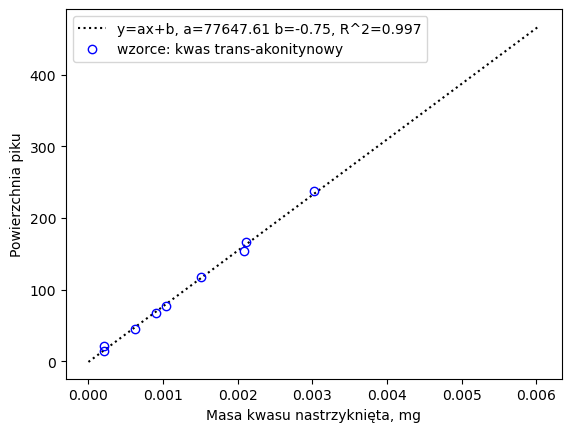

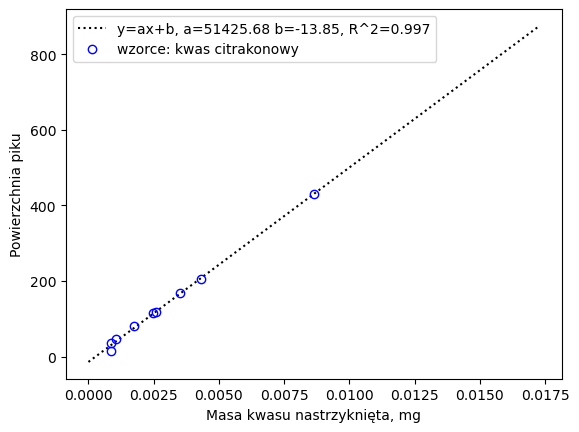

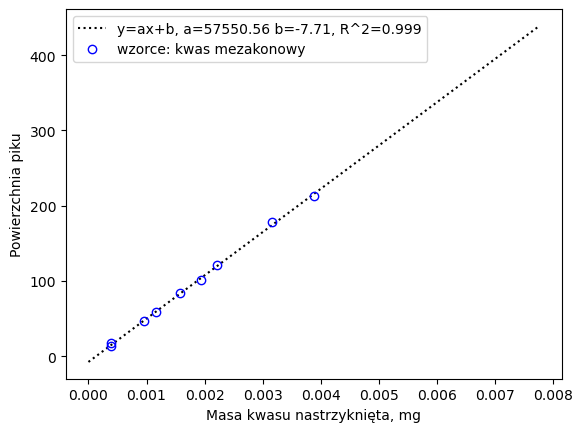

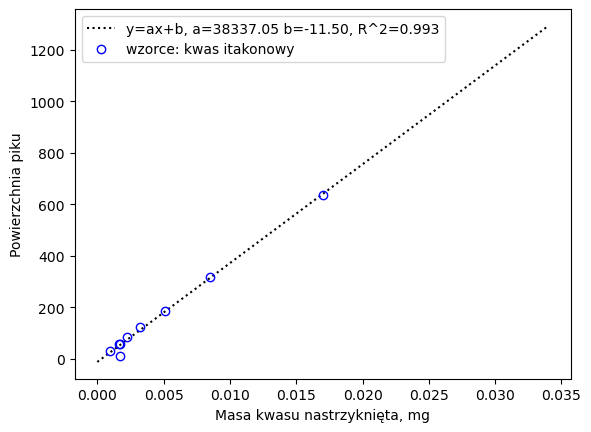

In [9]:
aa_ctr, bb_ctr = kalibracja(12.1, 54.8, tctr, 'kwas cytrynowy')
aa_cac, bb_cac = kalibracja(6.6, 11.1, tcac, 'kwas cis-akonitynowy')
aa_tac, bb_tac = kalibracja(5.2, 7.55, ttac, 'kwas trans-akonitynowy')
aa_cit, bb_cit = kalibracja(21.6, 8.81, tcit, 'kwas citrakonowy')
aa_mes, bb_mes = kalibracja(9.7, 7.9, tmes, 'kwas mezakonowy')
aa_ita, bb_ita = kalibracja(42.5, 8.1, tita, 'kwas itakonowy')

In [10]:
# test wzorców "0"

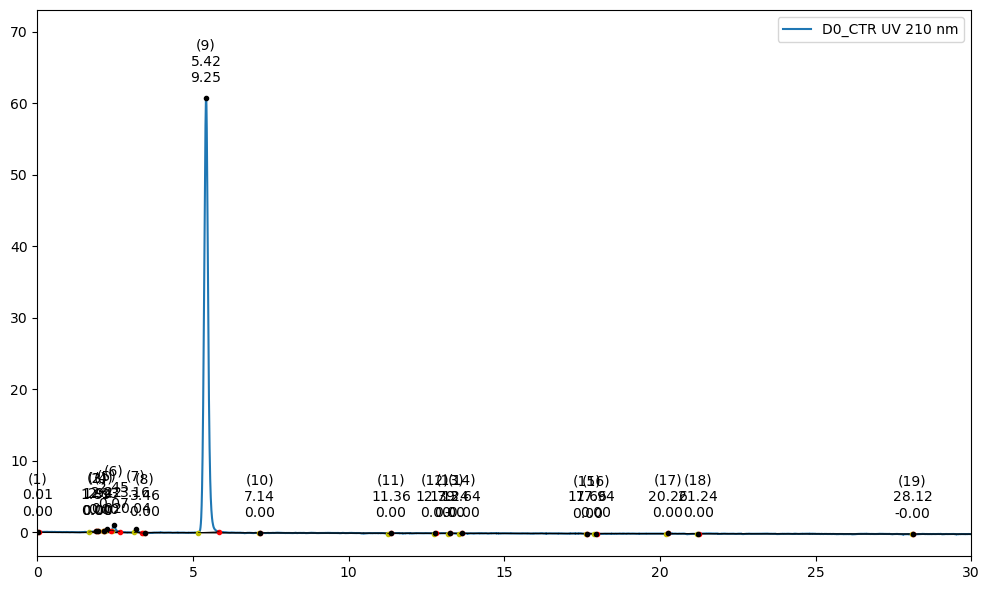

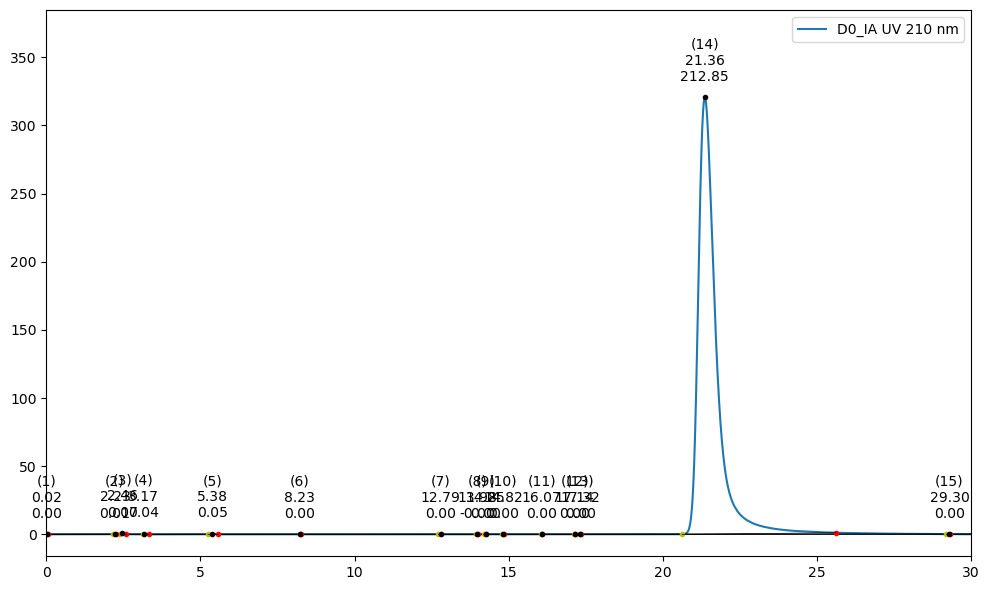

In [11]:
plot_report(b.D0_CTR_210, 0, 30)
plot_report(b.D0_IA_210, 0, 30)


In [13]:
m = (b.D0_CTR_210.p(5.4).a-bb_ctr)/aa_ctr

# 10uL

m*100 # mL w wialce HPLC

m*100*101 # w wialce z 5mL H2O

m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 480

diff = 100*(m-mm)/m

print("CTR obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

CTR obliczone: 437.4946, naważone: 480.0000, diff: -9.7%


In [14]:
m = (b.D0_IA_210.p(21.3).a-bb_ita)/aa_ita

# 10uL

m*100 # mL w wialce HPLC

m*100*101 # w wialce z 5mL H2O

m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 325

diff = 100*(m-mm)/m

print("IA obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

IA obliczone: 295.5308, naważone: 325.0000, diff: -10.0%


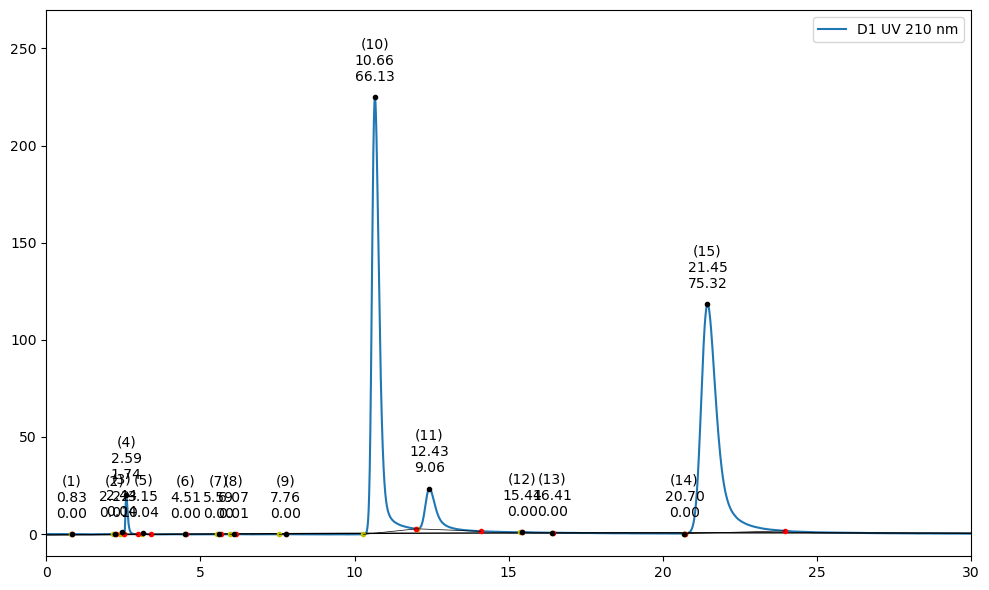

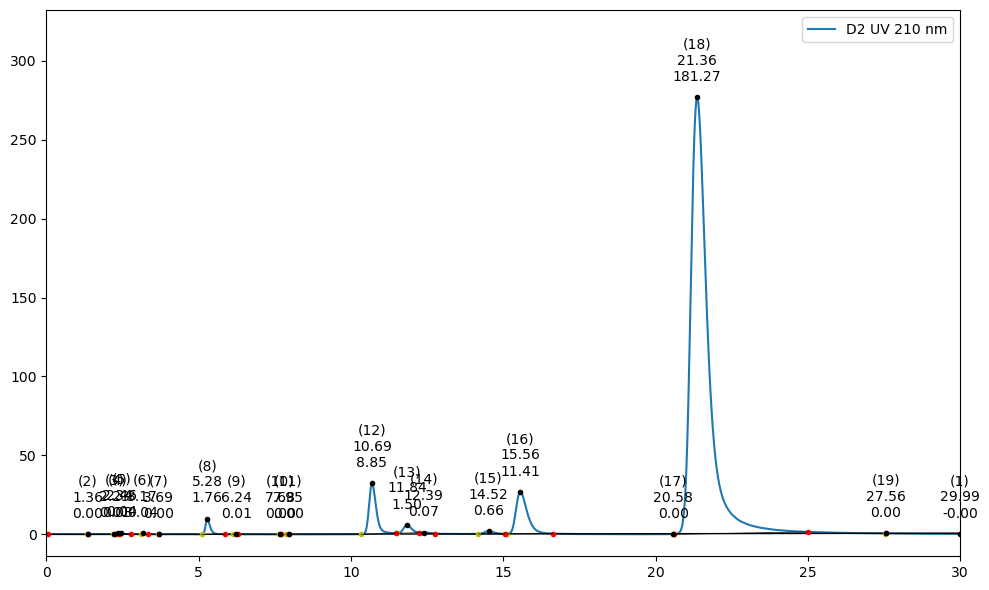

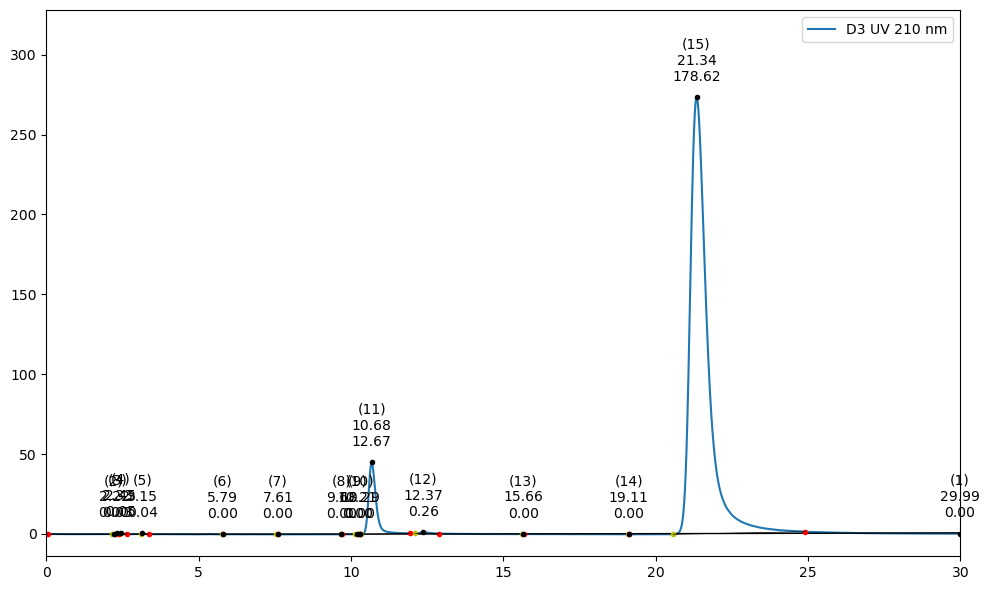

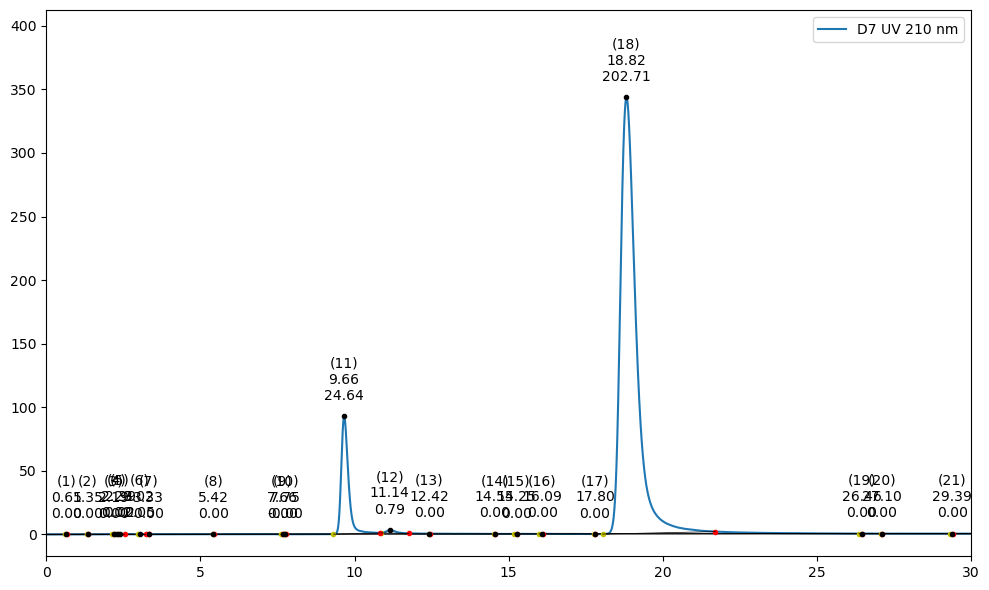

IA obliczone: 114.3702, naważone: 325.0000, diff: -184.2%


In [20]:
plot_report(b.D1_210, 0, 30)
plot_report(b.D2_210, 0, 30)
plot_report(b.D3_210, 0, 30)
plot_report(b.D7_210, 0, 30)

# IA-BET
m = (b.D1_210.p(21.3).a-bb_ita)/aa_ita
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 325

diff = 100*(m-mm)/m

print("IA obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

In [21]:
# IA-BET
m = (b.D1_210.p(21.3).a-bb_ita)/aa_ita
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 325

diff = 100*(m-mm)/m

print("IA-BET obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

# IA-CC
m = (b.D2_210.p(21.3).a-bb_ita)/aa_ita
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 325

diff = 100*(m-mm)/m

print("IA-CC obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))


# IA-TMAC
m = (b.D3_210.p(21.3).a-bb_ita)/aa_ita
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 325

diff = 100*(m-mm)/m

print("IA-TMAC obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))


# IA-TEAC
m = (b.D7_210.p(18.9).a-bb_ita)/aa_ita
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 325

diff = 100*(m-mm)/m

print("IA-TEAC obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))


IA-BET obliczone: 114.3702, naważone: 325.0000, diff: -184.2%
IA-CC obliczone: 253.9274, naważone: 325.0000, diff: -28.0%
IA-TMAC obliczone: 250.4382, naważone: 325.0000, diff: -29.8%
IA-TEAC obliczone: 282.1800, naważone: 325.0000, diff: -15.2%


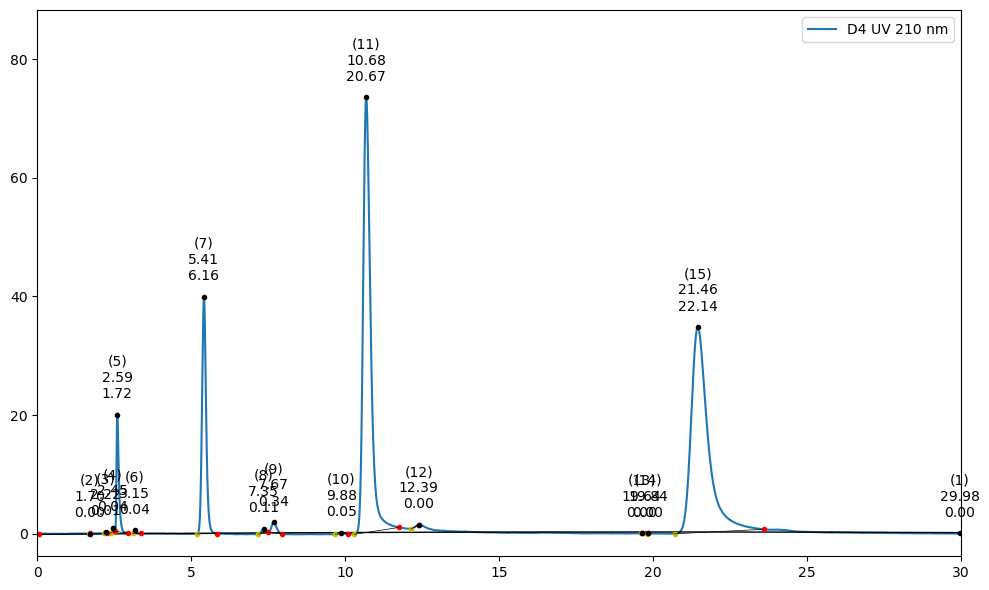

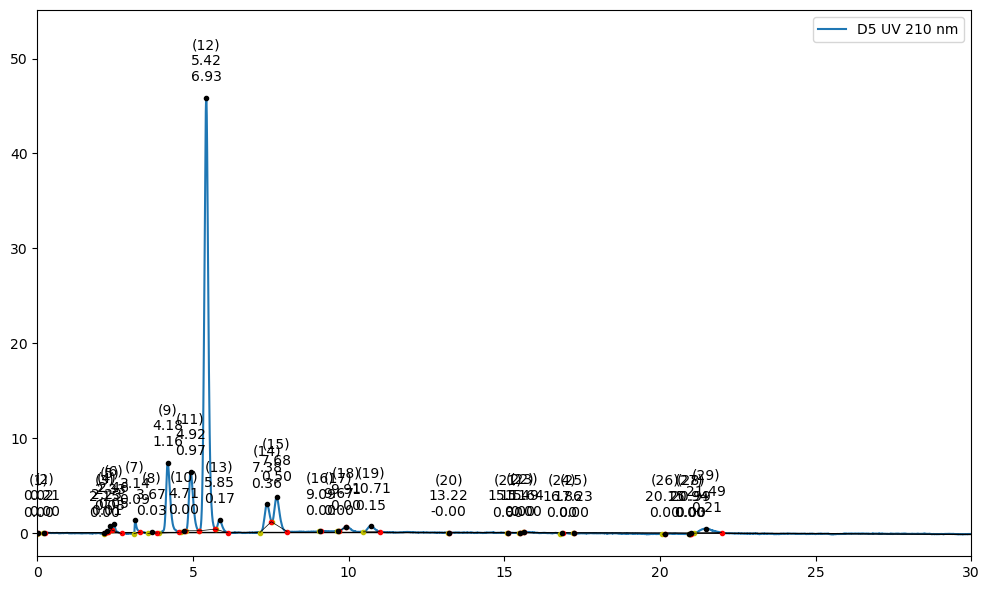

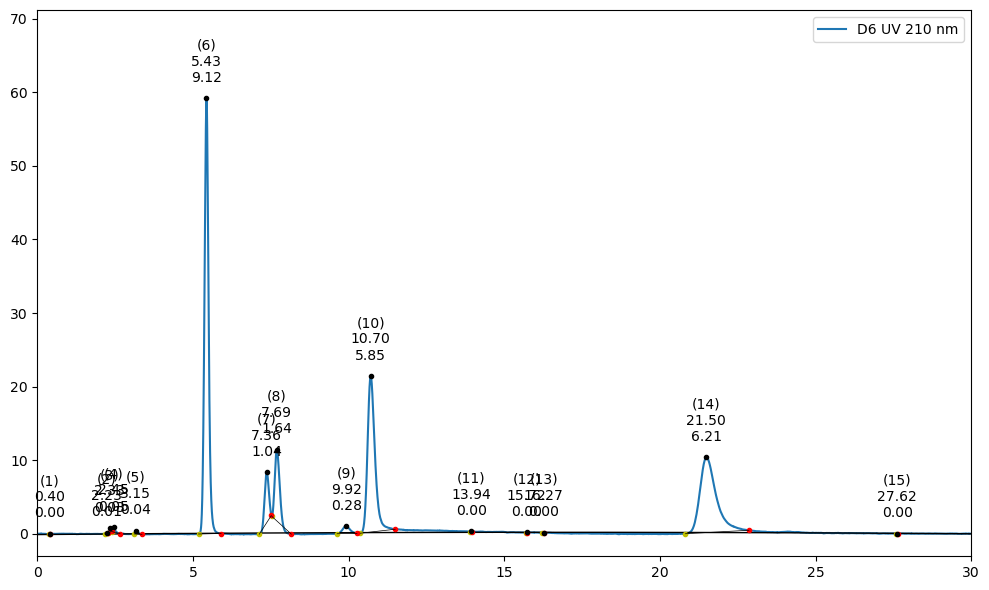

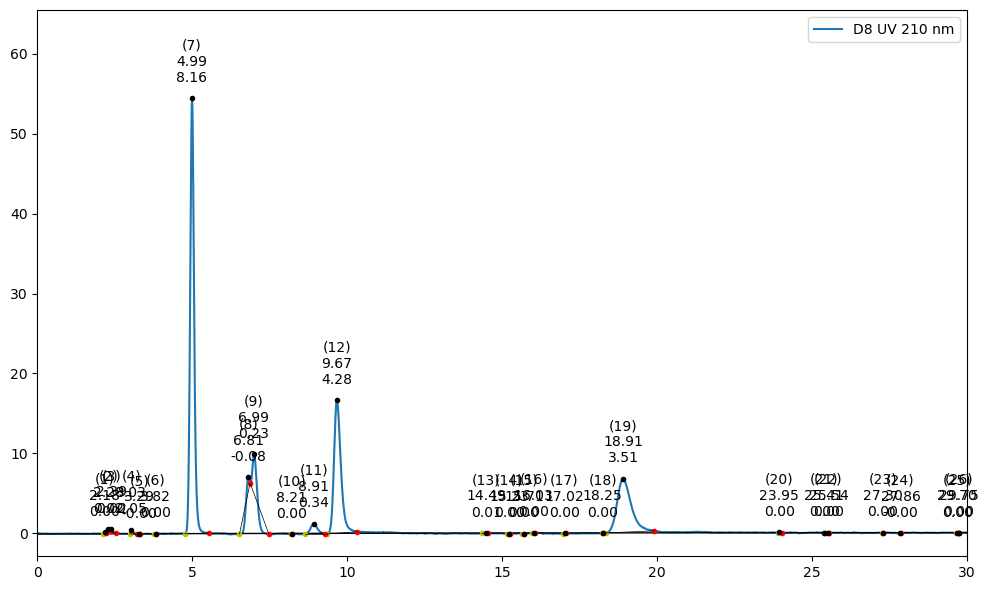

In [22]:
plot_report(b.D4_210, 0, 30)
plot_report(b.D5_210, 0, 30)
plot_report(b.D6_210, 0, 30) #TMAC śmierdział rybą (TCI)
plot_report(b.D8_210, 0, 30) #TEAC



In [19]:
# CTR-BET
m = (b.D4_210.p(5.4).a-bb_ctr)/aa_ctr
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 480

diff = 100*(m-mm)/m

print("CTR-BET obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

# CTR-CC
m = (b.D5_210.p(5.4).a-bb_ctr)/aa_ctr
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 480

diff = 100*(m-mm)/m

print("CTR-CC obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))


# CTR-TMAC
m = (b.D6_210.p(5.4).a-bb_ctr)/aa_ctr
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 480

diff = 100*(m-mm)/m

print("CTR-TMAC obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

# CTR-TEAC
m = (b.D8_210.p(4.99).a-bb_ctr)/aa_ctr
m= m*100*101*5 # OBICZONE wsypane do wialki

# naważono

mm = 480

diff = 100*(m-mm)/m

print("CTR-TEAC obliczone: {:.4f}, naważone: {:.4f}, diff: {:.1f}%".format(m, mm, diff))

CTR-BET obliczone: 289.7742, naważone: 480.0000, diff: -65.6%
CTR-CC obliczone: 326.4802, naważone: 480.0000, diff: -47.0%
CTR-TMAC obliczone: 431.5168, naważone: 480.0000, diff: -11.2%
CTR-TEAC obliczone: 385.1570, naważone: 480.0000, diff: -24.6%
